### Kaggle dataset: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks

### We begin with importing necessary libraries.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

In [2]:
df_comp = pd.read_csv("D:\\datasets\\github_financial_time_series_analysis\\sp500_companies.csv")
df_ind = pd.read_csv("D:\\datasets\\github_financial_time_series_analysis\\sp500_index.csv")
df_stock = pd.read_csv("D:\\datasets\\github_financial_time_series_analysis\\sp500_stocks.csv")

In [3]:
df_comp.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,226.51,3443880624128,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.066216
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,424.80,3157555150848,1.294330e+11,0.152,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.060711
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,127.25,3130133839872,4.927500e+10,2.621,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.060184
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,168.96,2068222574592,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.039766
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,167.18,2067682164736,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.039756


In [4]:
df_ind.tail()

,Date,S&P500
2511,2024-08-14,5455.21
2512,2024-08-15,5543.22
2513,2024-08-16,5554.25
2514,2024-08-19,5608.25
2515,2024-08-20,5597.12


In [5]:
df_stock.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,44.254017,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.976837,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.600502,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.632484,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.946964,70.501671,70.501671,69.648827,69.974915,4073337.0


In [24]:
df_stock.tail()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Return,Absolute_Return,...,Bollinger_Mid,Bollinger_Upper,Bollinger_Lower,MACD,MACD_Signal,MACD_Histogram,Log_Return,Volatility,Excess_Return,Sharpe_Ratio
1852041,2024-08-14,ZTS,183.380005,183.380005,188.500000,182.490005,188.050003,2153100.0,-2.654210,-5.000000,...,181.946000,188.621052,175.270948,2.464041,2.330857,0.133184,-0.026901,1.767861,-2.654210,0.103232
1852042,2024-08-15,ZTS,184.080002,184.080002,186.169998,182.710007,184.520004,1891900.0,0.381719,0.699997,...,182.188500,188.800191,175.576809,2.318249,2.328335,-0.010086,0.003810,1.767538,0.381719,0.101926
1852043,2024-08-16,ZTS,183.710007,183.710007,184.610001,182.250000,183.720001,1588400.0,-0.200997,-0.369995,...,182.445000,188.862436,176.027565,2.148091,2.292286,-0.144195,-0.002012,1.766053,-0.200997,0.105097
1852044,2024-08-19,ZTS,184.479996,184.479996,184.520004,182.559998,183.800003,1637000.0,0.419133,0.769989,...,182.631001,189.058435,176.203566,2.051720,2.244173,-0.192453,0.004183,1.766510,0.419133,0.107910
1852045,2024-08-20,ZTS,183.600006,183.600006,184.759995,182.900101,184.479996,1186374.0,-0.477011,-0.879990,...,182.842001,189.094767,176.589234,1.882636,2.171866,-0.289230,-0.004782,1.763475,-0.477011,0.111901


In [25]:
# View the columns for each DataFrame
print("Columns in df_comp:", df_comp.columns)
print()
print("Columns in df_ind:", df_ind.columns)
print()
print("Columns in df_stock:", df_stock.columns)

Columns in df_comp: Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

Columns in df_ind: Index(['Date', 'S&P500'], dtype='object')

Columns in df_stock: Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Return', 'Absolute_Return', 'SMA_20', 'SMA_200', 'EMA_20', 'EMA_200',
       'RSI_14', 'Bollinger_Mid', 'Bollinger_Upper', 'Bollinger_Lower', 'MACD',
       'MACD_Signal', 'MACD_Histogram', 'Log_Return', 'Volatility',
       'Excess_Return', 'Sharpe_Ratio'],
      dtype='object')


In [26]:
# Find common columns between the DataFrames
common_columns_comp_ind = df_comp.columns.intersection(df_ind.columns)
common_columns_comp_stock = df_comp.columns.intersection(df_stock.columns)
common_columns_ind_stock = df_ind.columns.intersection(df_stock.columns)

print("Common columns between df_comp and df_ind:", common_columns_comp_ind)
print("Common columns between df_comp and df_stock:", common_columns_comp_stock)
print("Common columns between df_ind and df_stock", common_columns_ind_stock)

Common columns between df_comp and df_ind: Index([], dtype='object')
Common columns between df_comp and df_stock: Index(['Symbol'], dtype='object')
Common columns between df_ind and df_stock Index(['Date'], dtype='object')


In [27]:
print(f"df_comp rows: {len(df_comp)}")
print(f"df_ind rows: {len(df_ind):,.0f}")
print(f"df_stock rows: {len(df_stock):,.0f}")
print()
total_len = len(df_comp) + len(df_ind) + len(df_stock)
print(f"{total_len:,.0f} total rows in all 3 datasets")

df_comp rows: 503
df_ind rows: 2,516
df_stock rows: 1,852,046

1,855,065 total rows in all 3 datasets


In [28]:
# Step 1: Join df2 (sp500_index.csv) and df3 (sp500_stocks.csv) on the 'Date' column
merged_df1 = pd.merge(df_ind, df_stock, on='Date', how='outer')
merged_df1.head()
len(merged_df1)

1852046

In [30]:
merged_df1.head(25)

,Date,S&P500,Symbol,Adj Close,Close,High,Low,Open,Volume,Return,...,Bollinger_Mid,Bollinger_Upper,Bollinger_Lower,MACD,MACD_Signal,MACD_Histogram,Log_Return,Volatility,Excess_Return,Sharpe_Ratio
0,2010-01-04,NaN,MMM,44.254017,69.414719,69.774246,69.122070,69.473244,3640265.0,NaN,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2010-01-04,NaN,AOS,5.963981,7.435000,7.480000,7.261667,7.295000,1104600.0,-95.329694,...,118.659199,172.714084,64.604315,-4.869889,3.311897,-8.181786,-3.063946,18.080396,-95.329694,-0.129237
2,2010-01-04,NaN,ABT,18.852142,26.129908,26.177889,25.870815,26.000362,10829095.0,-76.668142,...,78.407075,106.689301,50.124849,-5.871835,-1.927768,-3.944066,-1.455350,14.194303,-76.668142,-0.183410
3,2010-01-04,NaN,ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.685338,1.557305,0.128033,NaN,NaN,NaN,NaN
4,2010-01-04,NaN,ACN,32.071796,42.070000,42.200001,41.500000,41.520000,3650100.0,-83.649351,...,181.254088,251.998949,110.509227,-7.409812,2.889319,-10.299131,-1.810903,15.444107,-83.649351,-0.144570
5,2010-01-04,NaN,ADBE,37.090000,37.090000,37.299999,36.650002,36.650002,4710200.0,-88.773193,...,309.002497,437.550053,180.454940,-19.969273,-1.714165,-18.255108,-2.186866,16.335557,-88.773193,-0.156894
6,2010-01-04,NaN,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0,-98.274789,...,511.322497,749.361461,273.283533,-38.610943,-6.877657,-31.733286,-4.059821,18.016372,-98.274789,-0.181864
7,2010-01-04,NaN,AES,9.469490,13.670000,13.700000,13.380000,13.380000,4597600.0,-93.945339,...,133.299975,193.506393,73.093557,-12.176081,-6.220189,-5.955891,-2.804342,17.442037,-93.945339,-0.206755
8,2010-01-04,NaN,AFL,16.646257,23.785000,23.850000,23.250000,23.250000,4724000.0,-4.221759,...,17.042180,17.916021,16.168340,-0.164758,-0.240677,0.075919,-0.043135,2.873376,-4.221759,-0.059760
9,2010-01-04,NaN,A,20.084951,22.389128,22.625179,22.267525,22.453505,3815561.0,-80.834971,...,95.746248,132.060419,59.432077,-3.642329,1.482836,-5.125165,-1.652083,14.935777,-80.834971,-0.146101


In [31]:
# Step 2: Join the resulting dataframe with df1 (sp500_companies.csv) on the 'Symbol' column
df = pd.merge(merged_df1, df_comp, on='Symbol', how='outer')
df.head()

,Date,S&P500,Symbol,Adj Close,Close,High,Low,Open,Volume,Return,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,2010-01-04,NaN,A,20.084951,22.389128,22.625179,22.267525,22.453505,3815561.0,-80.834971,...,139.75,40773599232,1.612000e+09,-0.084,Santa Clara,CA,United States,17600.0,"Agilent Technologies, Inc. provides applicatio...",0.000784
1,2010-01-05,NaN,A,19.866777,22.145924,22.331903,22.002861,22.324751,4186031.0,-1.086256,...,139.75,40773599232,1.612000e+09,-0.084,Santa Clara,CA,United States,17600.0,"Agilent Technologies, Inc. provides applicatio...",0.000784
2,2010-01-06,NaN,A,19.796186,22.067240,22.174536,22.002861,22.067240,3243779.0,-0.355322,...,139.75,40773599232,1.612000e+09,-0.084,Santa Clara,CA,United States,17600.0,"Agilent Technologies, Inc. provides applicatio...",0.000784
3,2010-01-07,NaN,A,19.770527,22.038628,22.045780,21.816881,22.017166,3095172.0,-0.129619,...,139.75,40773599232,1.612000e+09,-0.084,Santa Clara,CA,United States,17600.0,"Agilent Technologies, Inc. provides applicatio...",0.000784
4,2010-01-08,NaN,A,19.764101,22.031473,22.067240,21.745352,21.917025,3733918.0,-0.032502,...,139.75,40773599232,1.612000e+09,-0.084,Santa Clara,CA,United States,17600.0,"Agilent Technologies, Inc. provides applicatio...",0.000784


In [32]:
len(df)

1852046

In [33]:
# set date as index column for time-series analysis
print(type(df['Date']))
df['Date'] = pd.to_datetime(df['Date'])  # Convert the Date column to datetime

<class 'pandas.core.series.Series'>


In [34]:
# Set Date as the index
df.set_index('Date', inplace=True)

In [35]:
# Sort by the index to ensure time series operations are correct
df.sort_index(inplace=True)

In [36]:
%store df

Stored 'df' (DataFrame)


### All three datasets have been merged into one.  Let's begin the analysis.

### Feature engineering/adding columns for datasets

In [50]:
# Calculate daily returns using the 'Adj Close' column
df_stock['Return'] = df_stock['Adj Close'].pct_change(fill_method = None) * 100  # Calculate daily returns as percentage
df['Return'] = df['Adj Close'].pct_change(fill_method = None) * 100 

In [7]:
df_stock.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Return
0,2010-01-04,MMM,44.254017,69.414719,69.774246,69.122070,69.473244,3640265.0,NaN
1,2010-01-05,MMM,43.976837,68.979935,69.590302,68.311035,69.230766,3405012.0,-0.626338
2,2010-01-06,MMM,44.600502,69.958191,70.735786,69.824417,70.133781,6301126.0,1.418167
3,2010-01-07,MMM,44.632484,70.008362,70.033447,68.662209,69.665550,5346240.0,0.071709
4,2010-01-08,MMM,44.946964,70.501671,70.501671,69.648827,69.974915,4073337.0,0.704599


In [51]:
# Calculate absolute returns as the change in 'Adj Close' from one day to the next
df_stock['Absolute_Return'] = df_stock['Adj Close'].diff()
df['Absolute_Return'] = df['Adj Close'].diff()

In [9]:
df_stock.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Return,Absolute_Return
0,2010-01-04,MMM,44.254017,69.414719,69.774246,69.122070,69.473244,3640265.0,NaN,NaN
1,2010-01-05,MMM,43.976837,68.979935,69.590302,68.311035,69.230766,3405012.0,-0.626338,-0.277180
2,2010-01-06,MMM,44.600502,69.958191,70.735786,69.824417,70.133781,6301126.0,1.418167,0.623665
3,2010-01-07,MMM,44.632484,70.008362,70.033447,68.662209,69.665550,5346240.0,0.071709,0.031982
4,2010-01-08,MMM,44.946964,70.501671,70.501671,69.648827,69.974915,4073337.0,0.704599,0.314480


In [52]:
# Simple Moving Average (SMA) - 20-day and 200-day
df_stock['SMA_20'] = df_stock['Adj Close'].rolling(window=20).mean()
df_stock['SMA_200'] = df_stock['Adj Close'].rolling(window=200).mean()

df['SMA_20'] = df['Adj Close'].rolling(window=20).mean()
df['SMA_200'] = df['Adj Close'].rolling(window=200).mean()

In [11]:
df_stock.tail()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Return,Absolute_Return,SMA_20,SMA_200
1852041,2024-08-14,ZTS,183.380005,183.380005,188.500000,182.490005,188.050003,2153100.0,-2.654210,-5.000000,181.946000,177.075446
1852042,2024-08-15,ZTS,184.080002,184.080002,186.169998,182.710007,184.520004,1891900.0,0.381719,0.699997,182.188500,177.223366
1852043,2024-08-16,ZTS,183.710007,183.710007,184.610001,182.250000,183.720001,1588400.0,-0.200997,-0.369995,182.445000,177.364634
1852044,2024-08-19,ZTS,184.479996,184.479996,184.520004,182.559998,183.800003,1637000.0,0.419133,0.769989,182.631001,177.507890
1852045,2024-08-20,ZTS,183.600006,183.600006,184.759995,182.900101,184.479996,1186374.0,-0.477011,-0.879990,182.842001,177.674339


In [53]:
# Exponential Moving Average (EMA) - 20-day and 200-day
df_stock['EMA_20'] = df_stock['Adj Close'].ewm(span=20, adjust=False).mean()
df_stock['EMA_200'] = df_stock['Adj Close'].ewm(span=200, adjust=False).mean()

df['EMA_20'] = df['Adj Close'].ewm(span=20, adjust=False).mean()
df['EMA_200'] = df['Adj Close'].ewm(span=200, adjust=False).mean()

In [13]:
# 3. Relative Strength Index (RSI) - 14-day period
window_length = 14

In [55]:
# Calculate the daily price changes
delta = df['Adj Close'].diff()

In [57]:
# Calculate the gains and losses
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()

In [56]:
# Calculate the RS and RSI
rs = gain / loss
df['RSI_14'] = 100 - (100 / (1 + rs))

In [58]:
# 4. Bollinger Bands (20-day SMA and 2 standard deviations)
df['Bollinger_Mid'] = df['Adj Close'].rolling(window=20).mean()
df['Bollinger_Upper'] = df['Bollinger_Mid'] + 2 * df['Adj Close'].rolling(window=20).std()
df['Bollinger_Lower'] = df['Bollinger_Mid'] - 2 * df['Adj Close'].rolling(window=20).std()

In [59]:
# 5. MACD (12-day EMA and 26-day EMA)
ema_12 = df['Adj Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Adj Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['MACD_Histogram'] = df['MACD'] - df['MACD_Signal']

In [60]:
(df['Return'] < -1).value_counts()

Return
False    1023414
True      828632
Name: count, dtype: int64

### Fix cumulative returns

In [61]:
# 7. Daily Log Returns
df['Log_Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

In [62]:
# 8. Volatility (30-day rolling standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=30).std()

In [63]:
# 9. Sharpe Ratio (using a risk-free rate assumption, e.g., 0)
# If you want to use a risk-free rate, adjust accordingly
risk_free_rate = 0
df['Excess_Return'] = df['Return'] - risk_free_rate
df['Sharpe_Ratio'] = df['Excess_Return'].rolling(window=30).mean() / df['Volatility']

In [64]:
df.tail(2)

,S&P500,Symbol,Adj Close,Close,High,Low,Open,Volume,Return,Absolute_Return,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-20,5597.12,QCOM,172.110001,172.110001,175.429993,171.179993,173.940002,6176182.0,30.002267,39.720001,...,172.11,191730548736,1.156500e+10,0.111,San Diego,CA,United States,50000.0,QUALCOMM Incorporated engages in the developme...,0.003686
2024-08-20,5597.12,ZTS,183.600006,183.600006,184.759995,182.900101,184.479996,1186374.0,6.675966,11.490005,...,183.60,83180167168,3.645000e+09,0.083,Parsippany,NJ,United States,14100.0,"Zoetis Inc. engages in the discovery, developm...",0.001599


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1852046 entries, 2010-01-04 to 2024-08-20
Data columns (total 40 columns):
 #   Column               Dtype  
---  ------               -----  
 0   S&P500               float64
 1   Symbol               object 
 2   Adj Close            float64
 3   Close                float64
 4   High                 float64
 5   Low                  float64
 6   Open                 float64
 7   Volume               float64
 8   Return               float64
 9   Absolute_Return      float64
 10  SMA_20               float64
 11  SMA_200              float64
 12  EMA_20               float64
 13  EMA_200              float64
 14  RSI_14               float64
 15  Bollinger_Mid        float64
 16  Bollinger_Upper      float64
 17  Bollinger_Lower      float64
 18  MACD                 float64
 19  MACD_Signal          float64
 20  MACD_Histogram       float64
 21  Log_Return           float64
 22  Volatility           float64
 23  Excess_Return    

In [66]:
df.describe()

,S&P500,Adj Close,Close,High,Low,Open,Volume,Return,Absolute_Return,SMA_20,...,Log_Return,Volatility,Excess_Return,Sharpe_Ratio,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,1.265548e+06,1.757167e+06,1.757167e+06,1.757167e+06,1.757167e+06,1.757167e+06,1.757167e+06,1.669899e+06,1.669899e+06,833215.000000,...,1.669899e+06,625391.000000,1.669899e+06,625391.000000,1.852046e+06,1.852046e+06,1.745268e+06,1.844682e+06,1.818908e+06,1.852046e+06
mean,3.216643e+03,9.618659e+01,1.037039e+02,1.048399e+02,1.025118e+02,1.036839e+02,6.966618e+06,1.244329e+02,1.790081e-02,126.271240,...,-2.027322e-05,432.904765,1.244329e+02,0.353336,2.168206e+02,1.033990e+11,6.769558e+09,5.929940e-02,5.804538e+04,1.988072e-03
std,9.994318e+02,2.054719e+02,2.056383e+02,2.080360e+02,2.031662e+02,2.055534e+02,3.318610e+07,7.922009e+02,2.859764e+02,73.405165,...,1.205390e+00,584.783885,7.922009e+02,0.063684,4.809506e+02,3.101038e+11,1.475975e+10,1.750563e-01,1.394809e+05,5.962423e-03
min,1.829080e+03,2.036244e-01,2.220000e-01,2.262500e-01,2.162500e-01,2.180000e-01,0.000000e+00,-9.996571e+01,-8.727210e+03,14.799490,...,-7.977937e+00,40.407274,-9.996571e+01,0.117615,7.770000e+00,6.226443e+09,-4.107000e+09,-5.730000e-01,2.800000e+01,1.197170e-04
25%,2.338023e+03,2.890313e+01,3.485000e+01,3.523000e+01,3.445000e+01,3.485000e+01,9.990000e+05,-5.318686e+01,-3.880829e+01,76.281582,...,-7.590062e-01,202.324968,-5.318686e+01,0.311257,6.690000e+01,1.861914e+10,1.594898e+09,-3.000000e-03,9.886000e+03,3.579937e-04
50%,2.914020e+03,5.341603e+01,6.228000e+01,6.291000e+01,6.160000e+01,6.226000e+01,2.179856e+06,6.607003e-02,2.854538e-02,114.489561,...,6.604822e-04,287.767237,6.607003e-02,0.355938,1.199400e+02,3.577275e+10,2.869578e+09,4.700000e-02,2.085000e+04,6.878093e-04
75%,4.123525e+03,1.024300e+02,1.126400e+02,1.138000e+02,1.114100e+02,1.126200e+02,5.000000e+06,1.137342e+02,3.886175e+01,156.421630,...,7.595630e-01,449.647709,1.137342e+02,0.397367,2.275600e+02,7.429831e+10,5.888083e+09,9.600000e-02,5.393200e+04,1.428547e-03
max,5.667200e+03,8.854820e+03,8.854820e+03,8.944000e+03,8.766080e+03,8.874990e+03,3.692928e+09,3.173486e+05,8.798140e+03,806.245227,...,8.062901e+00,37526.600141,3.173486e+05,0.624841,8.784150e+03,3.443881e+12,1.317810e+11,2.621000e+00,2.100000e+06,6.621612e-02


In [67]:
df.columns

Index(['S&P500', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume', 'Return', 'Absolute_Return', 'SMA_20', 'SMA_200', 'EMA_20',
       'EMA_200', 'RSI_14', 'Bollinger_Mid', 'Bollinger_Upper',
       'Bollinger_Lower', 'MACD', 'MACD_Signal', 'MACD_Histogram',
       'Log_Return', 'Volatility', 'Excess_Return', 'Sharpe_Ratio', 'Exchange',
       'Shortname', 'Longname', 'Sector', 'Industry', 'Currentprice',
       'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State', 'Country',
       'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

### Trend Analysis

#### How do stock prices evolve over time, and what are the long-term trends?

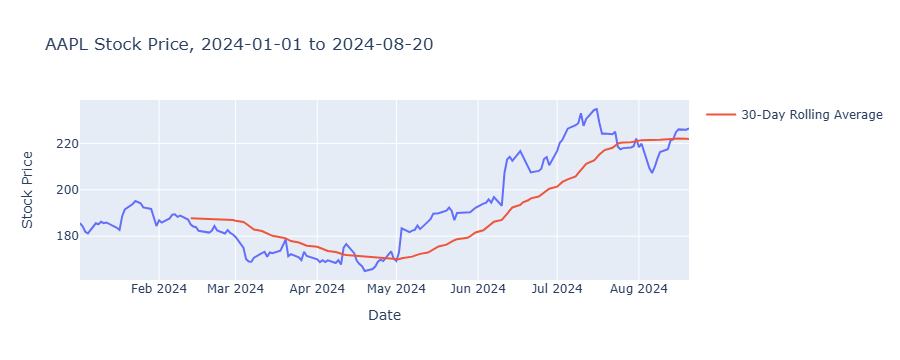

In [68]:
# Plot the raw time series data using Plotly (one stock, one date range)
stock = 'AAPL'
start_date = '2024-01-01'
end_date = '2024-08-20'

df_filtered = df[(df['Symbol'] == stock) & (df.index >= start_date) & (df.index <= end_date)].copy()

# Use .loc to set the rolling average to avoid the warning
df_filtered.loc[:, 'Rolling_Avg'] = df_filtered['Close'].rolling(window=30).mean()  # 30-day rolling average

fig = px.line(df_filtered, x=df_filtered.index, y='Close', title=f'{stock} Stock Price, {start_date} to {end_date}', labels={'Close':'Stock Price'})

# Add a rolling average line
fig.add_scatter(x=df_filtered.index, y=df_filtered['Rolling_Avg'], mode='lines', name='30-Day Rolling Average')

fig.show()

### Reference Stock List

In [69]:
stock_symbols = df['Symbol'].unique()  

# Convert to list (optional)
stock_symbols_list = sorted(stock_symbols.tolist())

# Display the full list of stock symbols
print(stock_symbols_list)

['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BG', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DAY', 'DD', 'DE', 'DECK', 'DFS', 'DG', 'DGX', 'DHI', 'DHR'

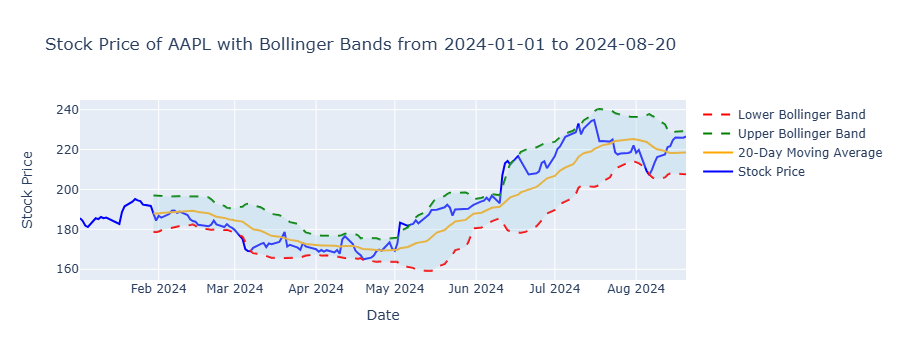

In [70]:
# Calculate the 20-day rolling mean (middle Bollinger band)
df_filtered['Rolling_Mean'] = df_filtered['Close'].rolling(window=20).mean()

# Calculate the rolling standard deviation
df_filtered['Rolling_Std'] = df_filtered['Close'].rolling(window=20).std()

# Calculate the upper and lower Bollinger Bands (2 standard deviations away from the moving average)
df_filtered['Upper_Band'] = df_filtered['Rolling_Mean'] + (df_filtered['Rolling_Std'] * 2)
df_filtered['Lower_Band'] = df_filtered['Rolling_Mean'] - (df_filtered['Rolling_Std'] * 2)

# Plot the filtered data with the Bollinger Bands using Plotly
fig = go.Figure()

# Add the original stock price line
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Close'], mode='lines', name='Stock Price', line=dict(color='blue')))

# Add the Rolling Mean (middle Bollinger band)
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Rolling_Mean'], mode='lines', name='20-Day Moving Average', line=dict(color='orange')))

# Add the Upper Bollinger Band
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Upper_Band'], mode='lines', name='Upper Bollinger Band', line=dict(color='green', dash='dash')))

# Add the Lower Bollinger Band
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Lower_Band'], mode='lines', name='Lower Bollinger Band', line=dict(color='red', dash='dash')))

# Fill the area between the upper and lower bands for better visualization
fig.add_trace(go.Scatter(
    x=df_filtered.index, y=df_filtered['Upper_Band'],
    mode='lines', line=dict(width=0), showlegend=False
))

fig.add_trace(go.Scatter(
    x=df_filtered.index, y=df_filtered['Lower_Band'],
    fill='tonexty', fillcolor='rgba(173,216,230,0.3)', 
    mode='lines', line=dict(width=0), showlegend=False
))

# Customize the layout of the plot
fig.update_layout(
    title=f'Stock Price of {stock} with Bollinger Bands from {start_date} to {end_date}',
    xaxis_title='Date',
    yaxis_title='Stock Price'
)

fig.show()

In [ ]:
df.head(2)

### How does stock market volatility behave, and how can we model it?

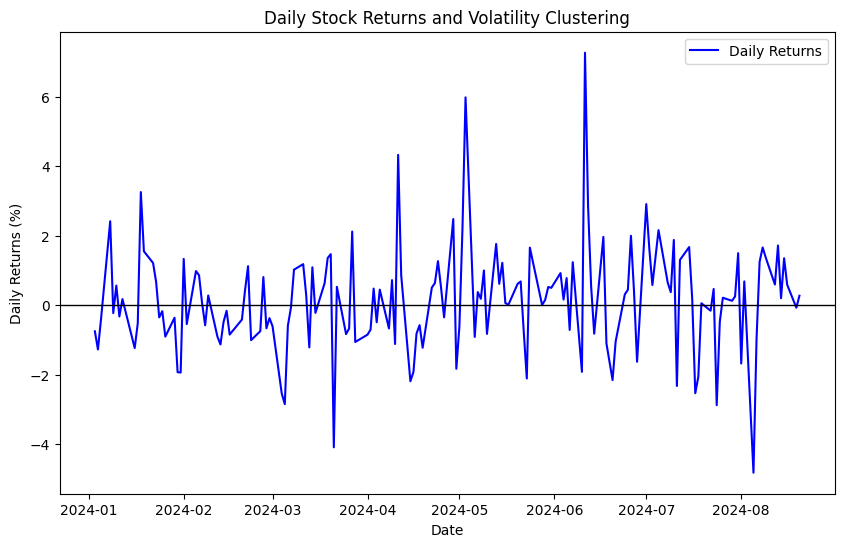

In [71]:
# Assuming df is already filtered to the specific stock and date range, and set with 'Date' as the index
df_filtered['Returns'] = df_filtered['Close'].pct_change() * 100  # Calculate daily returns as percentage

# Plot the daily returns to visualize volatility clustering
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['Returns'], color='blue', label='Daily Returns')
plt.title('Daily Stock Returns and Volatility Clustering')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.axhline(0, color='black', lw=1)
plt.legend()
plt.show()

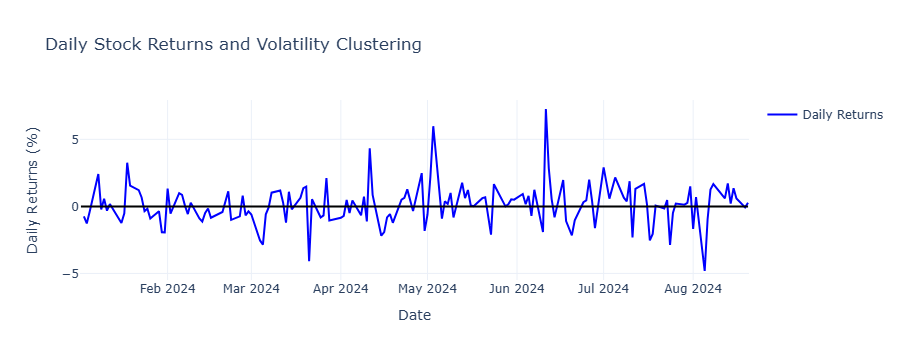

In [72]:
# Create a Plotly figure for daily returns
fig = go.Figure()

# Add daily returns as a line plot
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Returns'], mode='lines', name='Daily Returns', line=dict(color='blue')))

# Add a horizontal line at 0 for reference
fig.add_shape(type="line", x0=df_filtered.index.min(), y0=0, x1=df_filtered.index.max(), y1=0, line=dict(color="black", width=2))

# Update the layout for better aesthetics
fig.update_layout(
    title="Daily Stock Returns and Volatility Clustering",
    xaxis_title="Date",
    yaxis_title="Daily Returns (%)",
    showlegend=True,
    template="plotly_white"
)

fig.show()

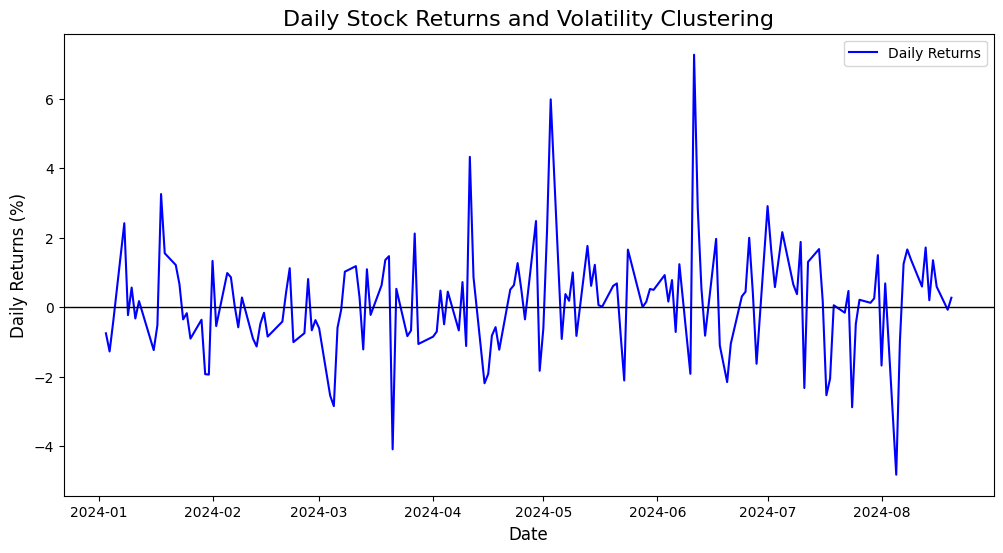

In [73]:
# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x=df_filtered.index, y='Returns', label='Daily Returns', color='blue')

# Add a horizontal line at 0 for reference
plt.axhline(0, color='black', linewidth=1)

# Add titles and labels
plt.title('Daily Stock Returns and Volatility Clustering', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Returns (%)', fontsize=12)
plt.legend()
plt.show()

In [74]:
# Rescale the returns (e.g., divide by 1000) for GARCH just in case
df['Rescaled_Returns'] = df['Return'] / 1000

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1212.4840633225194
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1118.0060455537896
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1118.1972689132904
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1118.0084891555198
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1117.9863999139009
Iteration:      6,   Func. Count:     35,   Neg. LLF: 1117.9863989532178
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1117.9863989532178
            Iterations: 6
            Function evaluations: 35
            Gradient evaluations: 6
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1117.99
Distribution:                  Normal 

C:\Users\blake\Documents\github\finance_time_series\venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.882e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




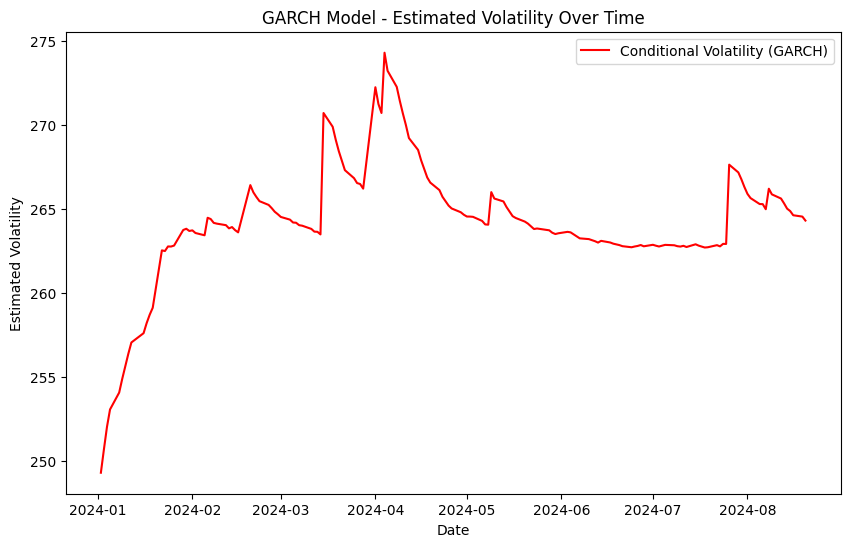

In [77]:
from arch import arch_model

# Drop NaN values in the returns (since pct_change creates NaNs for the first row)
df.dropna(subset=['Return'], inplace=True)

# Fit a GARCH(1,1) model to the daily returns
model = arch_model(df_filtered['Return'], vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Print the summary of the GARCH model fit
print(garch_fit.summary())

# Plot the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, garch_fit.conditional_volatility, color='red', label='Conditional Volatility (GARCH)')
plt.title('GARCH Model - Estimated Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Volatility')
plt.legend()
plt.show()

### Are there seasonal patterns in stock returns (e.g., monthly effects, day-of-the-week effects)?

                                     SARIMAX Results                                     
Dep. Variable:                            Return   No. Observations:                  232
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1091.007
Date:                           Thu, 22 Aug 2024   AIC                           2192.013
Time:                                   13:12:48   BIC                           2209.072
Sample:                               01-02-2024   HQIC                          2198.899
                                    - 08-20-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0373      0.102     -0.365      0.715      -0.238       0.163
ma.L1         -1.0000      0.055    -18.189

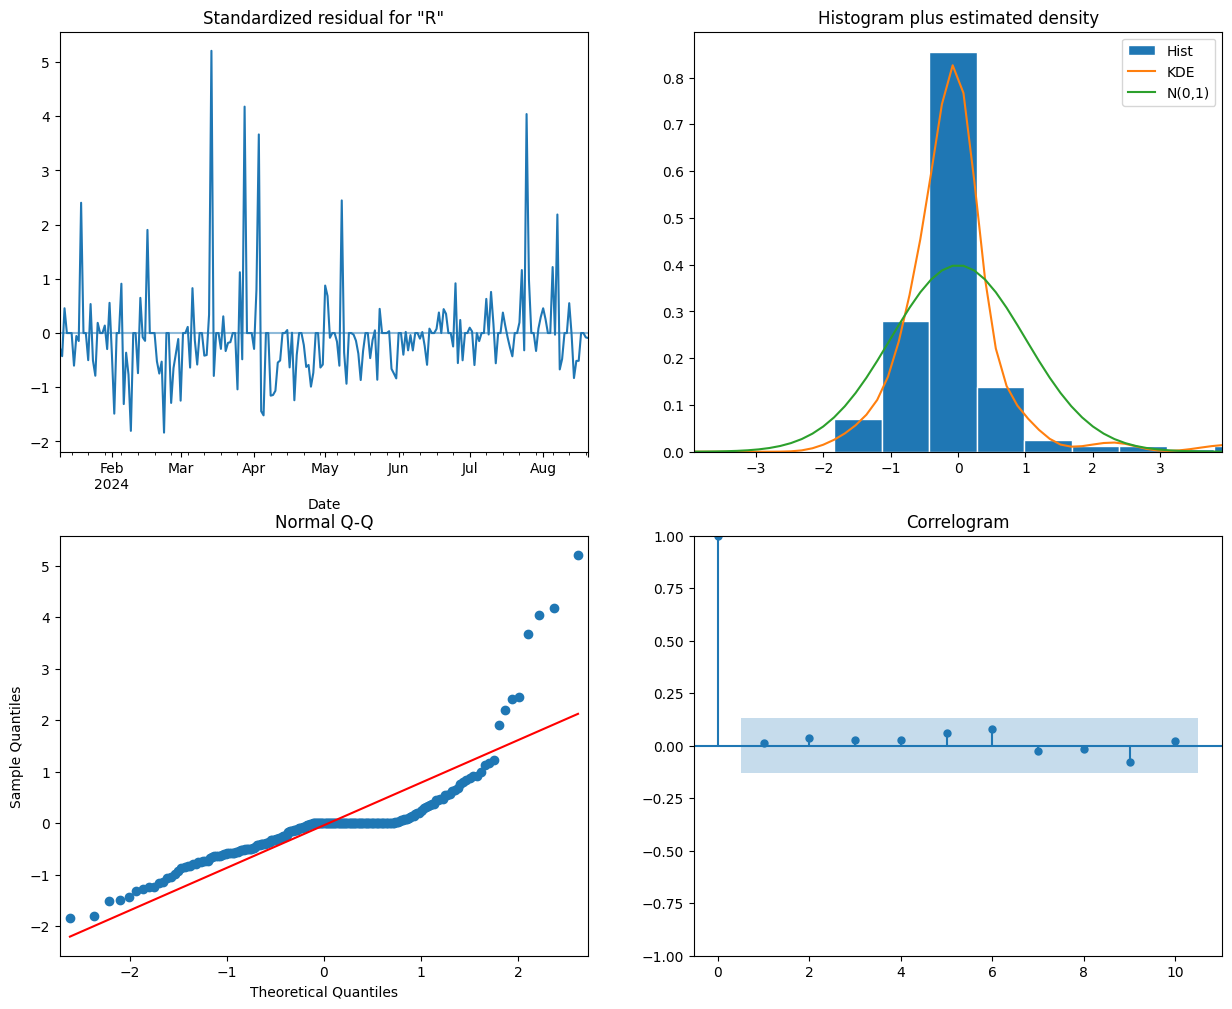

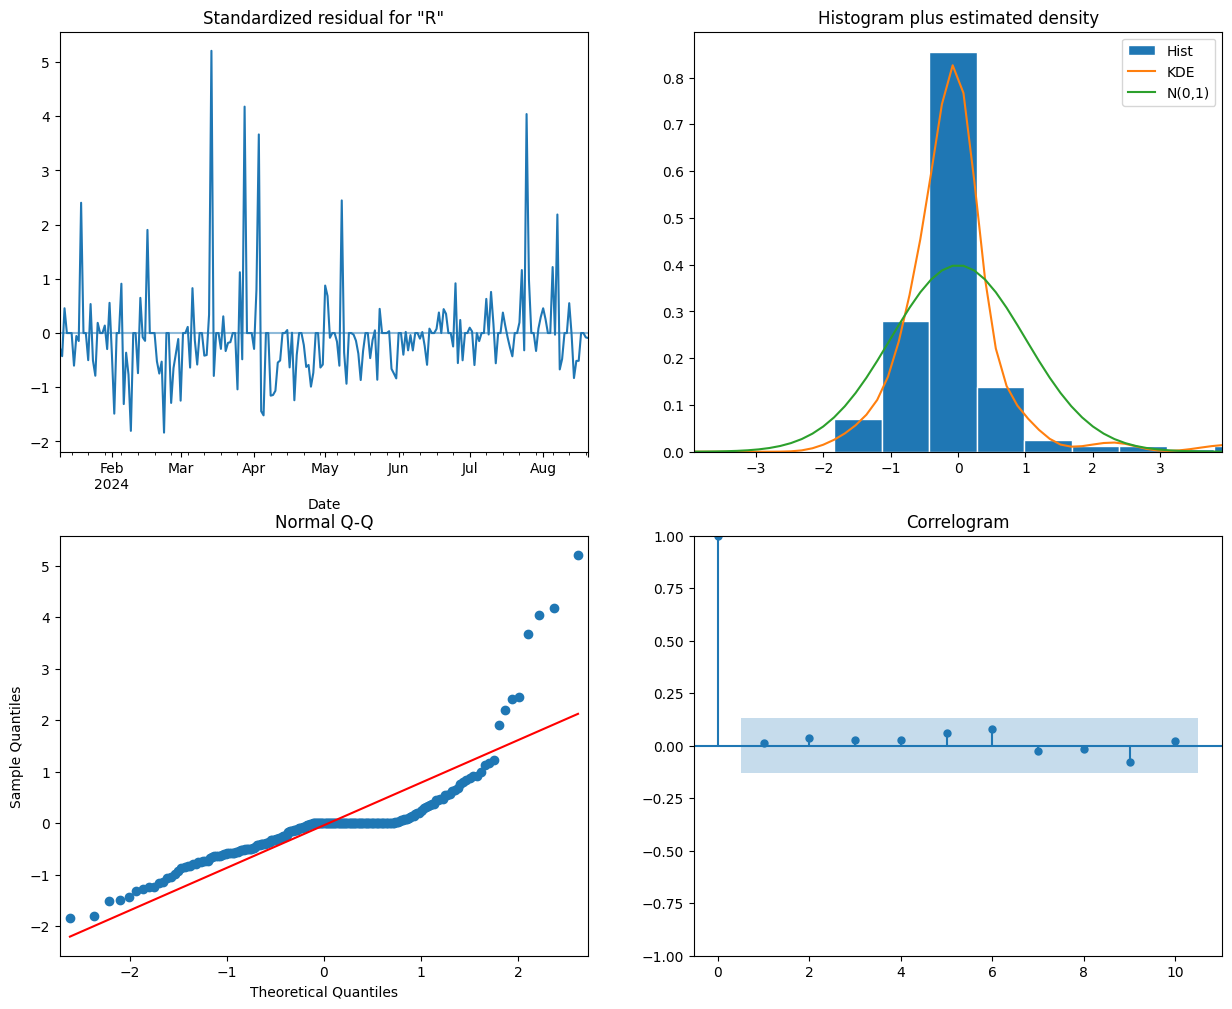

In [82]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

start_date = '2024-01-01'
end_date = '2024-12-31'

df_filtered = df_filtered.loc[start_date:end_date]

# set frequency automatically (can do a manual "frequency = 'D'"" if needed)
df_filtered = df_filtered.asfreq(pd.infer_freq(df_filtered.index))

# SARIMA modeling: assuming we want to check for weekly seasonality (7 days)
model = SARIMAX(df_filtered['Return'], order=(1,1,1), seasonal_order=(1,1,1,7))
sarima_result = model.fit()

# Summary of SARIMA model
print(sarima_result.summary())

# Plotting diagnostics
sarima_result.plot_diagnostics(figsize=(15, 12))